In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe
from Admin import Admin, MeanReturn, MoneyWeightedReturn,SimpleReturn,TimeWeightedReturn,Volatility,ReturnAttribCurrency
import pandas as pd


We are in a good state, target weights with short selling returned


([(0.106, 0.073)],
 [{'HBD.TO': 0.0706155822653547,
   'HGU.TO': 0.035815411850528125,
   'OIH': -0.04275346172816138,
   'RIT.TO': 0.5126017824021578,
   'EMB': 0.42372068521012085}])

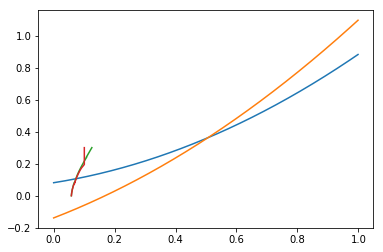

In [2]:
test_admin=Admin()
test_admin.suggestPortfolio('2','2014-04-01')

In [3]:
test_admin.acceptPortfolio(0)

{'HBD.TO': 782.799532481613,
 'HGU.TO': 325.9324691312358,
 'OIH': -171.34988549044567,
 'RIT.TO': 10530.935361959113,
 'EMB': 882.2475139639613}

In [4]:
test_admin.trackPortfolio()

In [5]:
from datetime import datetime
date_format='%Y-%m-%d'
start_date='2014-04-01'
today_date=test_admin.today
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]
portf_values=[]
for item in all_dates:
    portf_values.append(test_admin.getAccountValue(item))

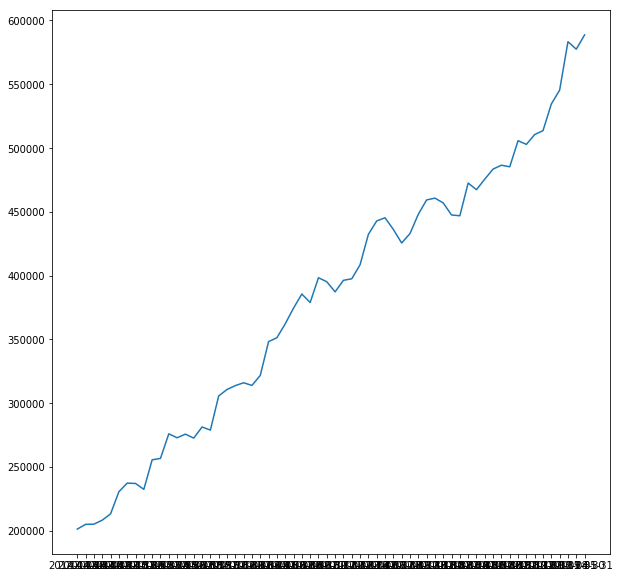

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(all_dates,portf_values)

In [7]:
print(MeanReturn(test_admin.portfolio,start_date,test_admin.today))
print(Volatility(test_admin.portfolio,start_date,test_admin.today))

0.20458409329932753
0.09512417793846623


In [8]:
from Admin import PortfolioVaR

In [11]:
betas,VAR_test=PortfolioVaR(test_admin,start_date,test_admin.today)

In [16]:
model1=universe.fitFactorModel("HBD.TO",start_date,252*5)

In [14]:
for item in test_admin.PortfolioWeights.keys():
    print(universe.get_security(item).currency)

CAD
CAD
USD
CAD
USD


In [17]:
print(model1.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002AE47CB44A8>>
